In [881]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [882]:
df = pd.read_csv("articleInfo.csv")
df2 = pd.read_csv("authorInfo.csv")

In [883]:
df = pd.merge(df, df2, on='Article No.')
df = df.fillna(0)

In [884]:
df.head()

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


Problem 1

In [885]:
publications = {}
citations = {}
countries = {}
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    cite = df.loc[index]['Citation']
    temp = title
    year = df.loc[index]['Year']
    if year in publications:
        count = publications[year] + 1
        publications[year] = count
        count = citations[year] + cite
        citations[year] = count
    else:
        publications[year] = 1
        citations[year] = cite


[Text(0.5, 1.0, 'Yearly Publication'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Publications')]

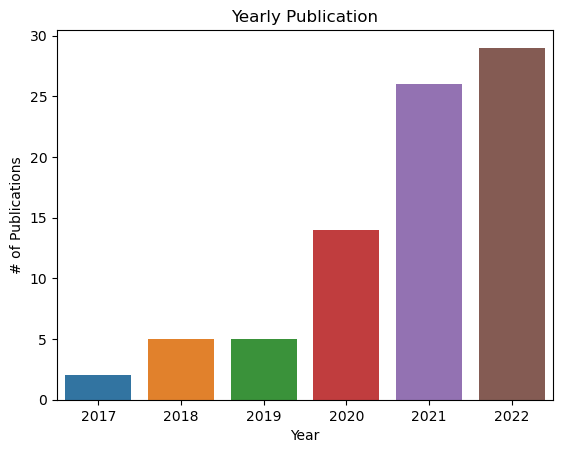

In [886]:
keys = list(publications.keys())
vals = list(publications.values())
sns.barplot(x=keys, y=vals).set(title="Yearly Publication", xlabel ="Year", ylabel="# of Publications")

[Text(0.5, 1.0, 'Yearly Citations'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Citations')]

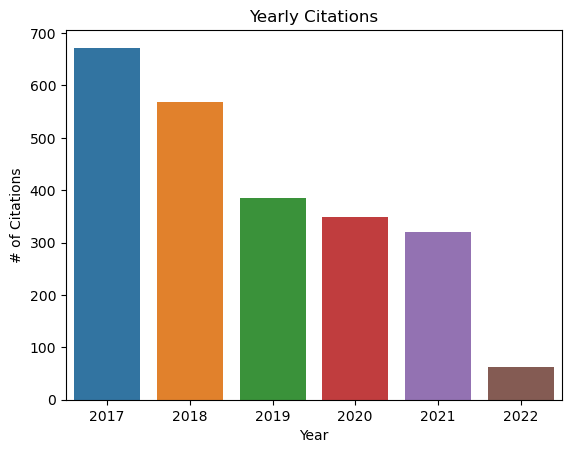

In [887]:
keys = list(citations.keys())
vals = list(citations.values())
sns.barplot(x=keys, y=vals).set(title="Yearly Citations", xlabel ="Year", ylabel="# of Citations")

In [888]:
countries = {}
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    temp = title
    country = df.loc[index]['Country']
    if country in countries:
        count = countries[country] + 1
        countries[country] = count
    else:
        countries[country] = 1


In [889]:
countries = pd.DataFrame(countries, index=['countries'])

In [890]:
countries = countries.melt()

In [891]:
countries.rename(columns={'variable': 'Country', 'value': 'Publication Count'}, inplace=True)

In [892]:
countries.head(30)

,Country,Publication Count
0,Taiwan,4
1,Korea,1
2,South Africa,1
3,United Kingdom,6
4,USA,8
5,Cyprus,2
6,China,17
7,Germany,5
8,Mexico,1
9,Italy,3


In [901]:
countries = countries.sort_values(['Publication Count'], ascending=True)
countries.reset_index(inplace=True)
countries.drop(['index'], axis=1, inplace=True)
countries.rename(columns={'Country' : 'name'}, inplace=True)

In [900]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) 
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [905]:
world = pd.merge(world, countries, on='name', how='left').fillna(0)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Publication Count_x,Publication Count_y,Publication Count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,0.0,0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0,0.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0,0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.0,3.0,3.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0,0.0,0.0


<AxesSubplot:>

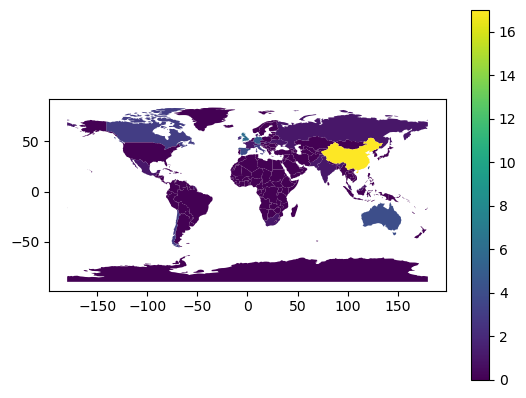

In [908]:
fix, ax = plt.subplots(1,1)
world.plot(ax=ax, column='Publication Count', legend=True)

In [ ]:
institutions = {} 
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    temp = title
    school = df.loc[index]['Author Affiliation']
    if school in institutions:
        count = institutions[school] + 1
        institutions[school] = count
    else:
        institutions[school] = 1

In [ ]:
top_5 = sorted(institutions.items(), key=lambda x: x[1], reverse=True)


In [ ]:
print("Top 5 Universities with the Most Publications:")
rank = 1
for school in top_5:
    print(str(rank) + ". " + str(school[0]))
    rank = rank + 1
    if rank == 6:
        break

Top 5 Universities with the Most Publications:
1. Cyprus University of Technology
2. University of Copenhagen
3. Fudan University 
4. National Taiwan Ocean University
5. Daejeon Health Institute of Technology


In [ ]:
df.head()

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


In [ ]:
highest_h = {}
for index in range(df.shape[0]):
    author = df.loc[index]['Author Name']
    h = df.loc[index]['h-index']
    if author in highest_h:
        count = highest_h[author] + h
        highest_h[author] = count
    else:
        highest_h[author] = h

In [ ]:
top_5 = sorted(highest_h.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print("Top 5 Researchers with the Highest h-index:")
rank = 1
for school in top_5:
    print(str(rank) + ". " + str(school[0]))
    rank = rank + 1
    if rank == 6:
        break

Top 5 Researchers with the Highest h-index:
1. Ulrich Trautwein
2. Nicolas Molinari
3. George S. Athwal
4. Sellappan Palaniappan
5. Maria Luisa Lorusso


Problem 2

In [ ]:
df = pd.read_csv(r"D:\UF_Machine_Learning\Undergraduate\data.csv")

In [ ]:
df.head()

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 6'], axis=1)

In [ ]:
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [ ]:
y = df[["SUS"]]
y


,SUS
0,84
1,58
2,56
3,55
4,95
...,...
95,57
96,93
97,80
98,82


In [ ]:
x = df.drop(columns=['SUS'], axis=1)
x

,Purchase,Duration,Gender,ASR_Error,Intent_Error
0,1,254,0,3,2
1,0,247,0,6,9
2,0,125,1,6,8
3,0,22,0,11,7
4,1,262,0,2,3
...,...,...,...,...,...
95,0,358,0,13,7
96,1,71,0,3,0
97,0,34,1,0,9
98,1,49,1,4,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
reg = LinearRegression().fit(x_train,y_train)
y_predict = reg.predict(x_test)
score = reg.score(x_test, y_test)
print("Coefficient of Determination: ", score)

Coefficient of Determination:  0.46346746944497763


In [ ]:
corr_matrix = df.corr()
corr_matrix["SUS"].sort_values(ascending=False)

SUS             1.000000
Purchase        0.661931
Gender          0.111523
Duration       -0.006631
ASR_Error      -0.662405
Intent_Error   -0.693675
Name: SUS, dtype: float64

It would appear that Intent_Error, ASR_Error, and Purchase are significant features in correlation to SUS as shown by the corr_matrix. It appears that gender and duration are insignificant in relation to SUS.

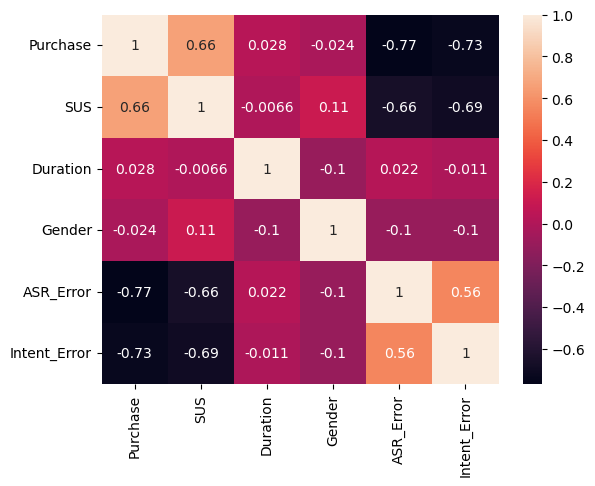

In [ ]:
ax = sns.heatmap(corr_matrix, annot=True)

3. I was not expecting Gender to play a significant role because Siri should not really be able to differentiate or discriminate between genders, however I was surprised that duration had such little effect in influencing SUS scores. I was expecting duration to be slightly more significant because I was assuming that longer interactions between Siri and the user would confuse Siri with more information. The other features were expected in my opinion. Purchase is clearly important because it shows whether Siri provided the user enough information to want to purchase a flight. As for ASR_Error and Intent_Error, those are significant because they reflected the number of errors that Siri made during its interaction with the user. These errors are impactly to SUS scores because they made the user experience more inconvenient overall as the number of these errors increased.

4. The model suggests that the most influential factor is Intent_Error. Compared to the rest of the features, Intent_Error has the highest correlation (in terms of absolute value) as shown by the heat map above.

5. I think that the reason why Intent_Error, ASR_Error, and Purchase are all significnat predictors for SUS is because they are all directly related to user convenience. In relation to the first 2, an increased number of errors implies that the user did not reach the solution to the query that they were looking for which would negatively impact their SUS score. As for purchase, it can be used as evidence as to whether a user was satisfied enough with the flight information to want to buy a flight.

Part 3

In [ ]:
y = x['Purchase']

In [ ]:
x = x.drop(columns=['Purchase'], axis=1)

In [ ]:
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.15)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [ ]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [ ]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.82      0.90        11

    accuracy                           0.87        15
   macro avg       0.83      0.91      0.85        15
weighted avg       0.91      0.87      0.87        15

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.73      0.84        11

    accuracy                           0.80        15
   macro avg       0.79      0.86      0.78        15
weighted avg       0.89      0.80      0.81        15

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.73      0.84        11

    accuracy                           0.80        15
   macro avg       0.79      0.86      0.78        15
weighted avg       0.89      0.80      0.81        15

              preci

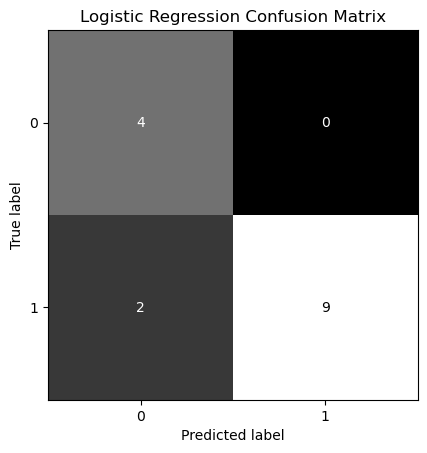

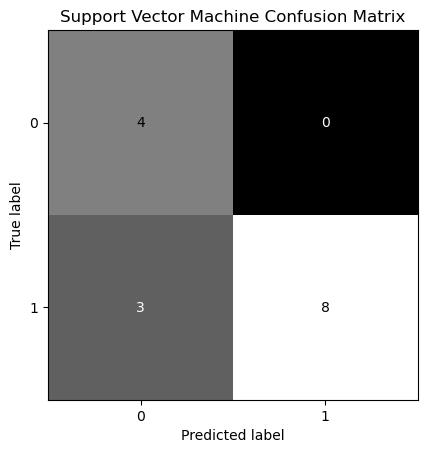

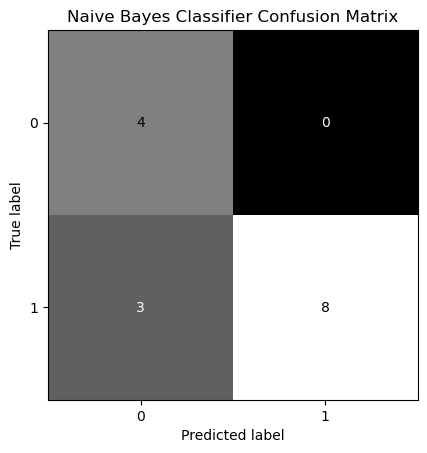

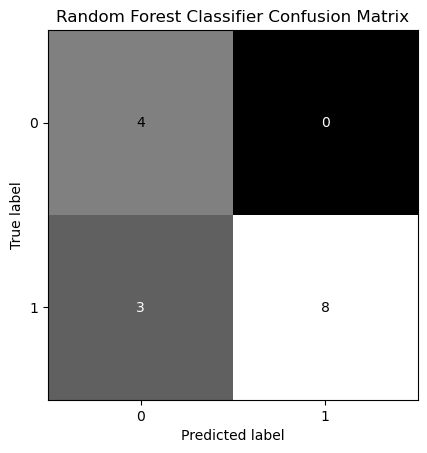

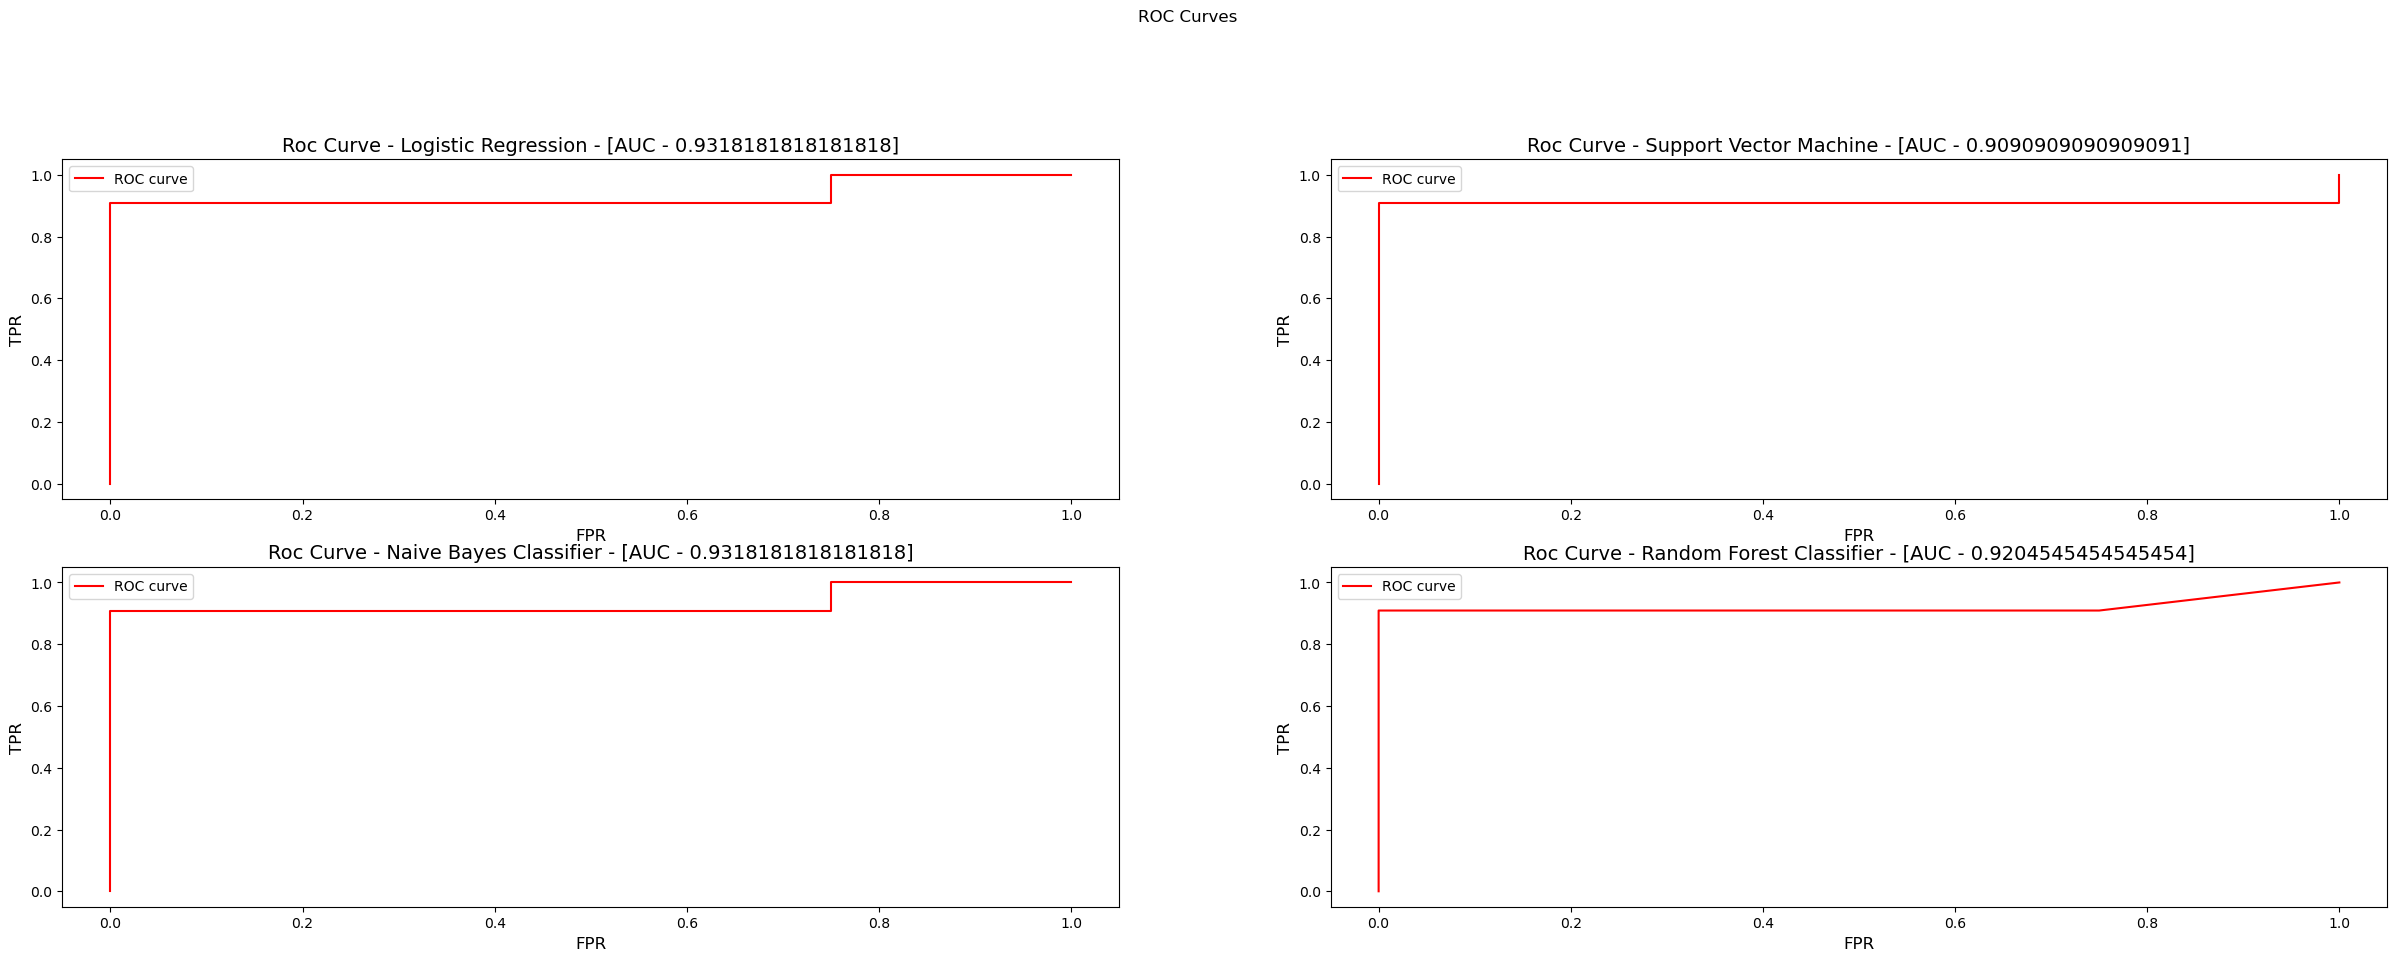

In [ ]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()